
# Finding Capacity and Location of Renewable Energy Generators in ERCOT

Use meta data from the aws s3 bucket. Can download data using these command:

aws s3 cp s3://arpa-e-perform/ERCOT/MetaData/solar_meta.xlsx ./

aws s3 cp s3://arpa-e-perform/ERCOT/MetaData/wind_meta.xlsx ./

## Importing Data from Local Computer

In [1]:
import pandas as pd

wind = pd.read_excel (r'/Users/Rakene/Documents/Academics/280/ERCOT/wind_meta.xlsx')
solar = pd.read_excel (r'/Users/Rakene/Documents/Academics/280/ERCOT/solar_meta.xlsx')

## Split data into existing generators and propopsed generators

In [2]:
wind_real = wind[wind['Group'] == "Existing"]
solar_real = solar[solar['proposed'] == "Existing"]
wind_pro = wind[wind['Group'] == "Proposed"]
solar_pro = solar[solar['proposed'] == "Proposed"]

## Calculating the Total Capacity

In [3]:
wind_cap = sum(wind_real['Capacity'])
wind_cap_pro = sum(wind_pro['Capacity'])
solar_cap = sum(solar_real['AC_capacity_MW'])
solar_cap_pro = sum(solar_pro['AC_capacity_MW'])
print('The total wind capacity of existing generators is ' + str(wind_cap) + ' MW.')
print('The total wind capacity of proposed generators is ' + str(wind_cap_pro) + ' MW.')
print('The total solar capacity of existing generators is ' + str(solar_cap) + ' MW.')
print('The total solar capacity of proposed generators is ' + str(solar_cap_pro) + ' MW.')

The total wind capacity of existing generators is 29963.0 MW.
The total wind capacity of proposed generators is 30489.680000000004 MW.
The total solar capacity of existing generators is 650.9700000000001 MW.
The total solar capacity of proposed generators is 39885.369999999995 MW.


## Importing libraries

In [4]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

## Importing Shape File for Texas

Downloaded the shape file from here: https://catalog.data.gov/dataset/tiger-line-shapefile-2016-state-texas-current-county-subdivision-state-based

In [36]:
texas = gpd.read_file('/Users/Rakene/Documents/Academics/280/ERCOT/Texas_Map/tl_2016_48_cousub.shp')
#solar_real.head()

## Ploting Existing Generators

In [37]:
geometry = [Point(xy) for xy in zip(wind_real['longi'], wind_real['lati'])]
geo_wind_real = gpd.GeoDataFrame(wind_real, geometry = geometry)
#geo_wind_real.head()

geometry1 = [Point(xy) for xy in zip(solar_real['longitude'], solar_real['latitude'])]
geo_solar_real = gpd.GeoDataFrame(solar_real, geometry = geometry1)
#geo_solar_real.head()


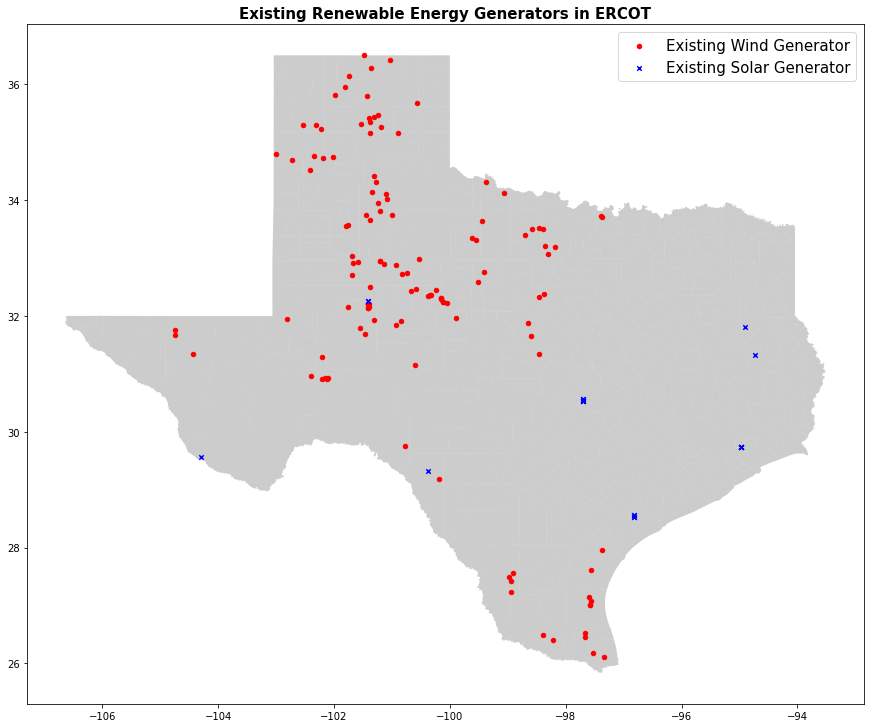

In [38]:
fig, ax = plt.subplots(figsize = (15,15))
texas.plot(ax = ax, alpha = 0.4, color="grey")

geo_wind_real.plot(ax=ax, marker='o', color='red', markersize=20, label="Existing Wind Generator")
geo_solar_real.plot(ax=ax, marker='x', color='blue', markersize=20, label="Existing Solar Generator")

plt.title('Existing Renewable Energy Generators in ERCOT', fontsize=15,fontweight='bold')


#geo_wind_real['geometry'].plot(ax = ax, markersize = 20, color = "blue", marker="o", label= "Existing Wind Generator")
plt.legend(prop={'size':15})
plt.show()

## Ploting Proposed Generators

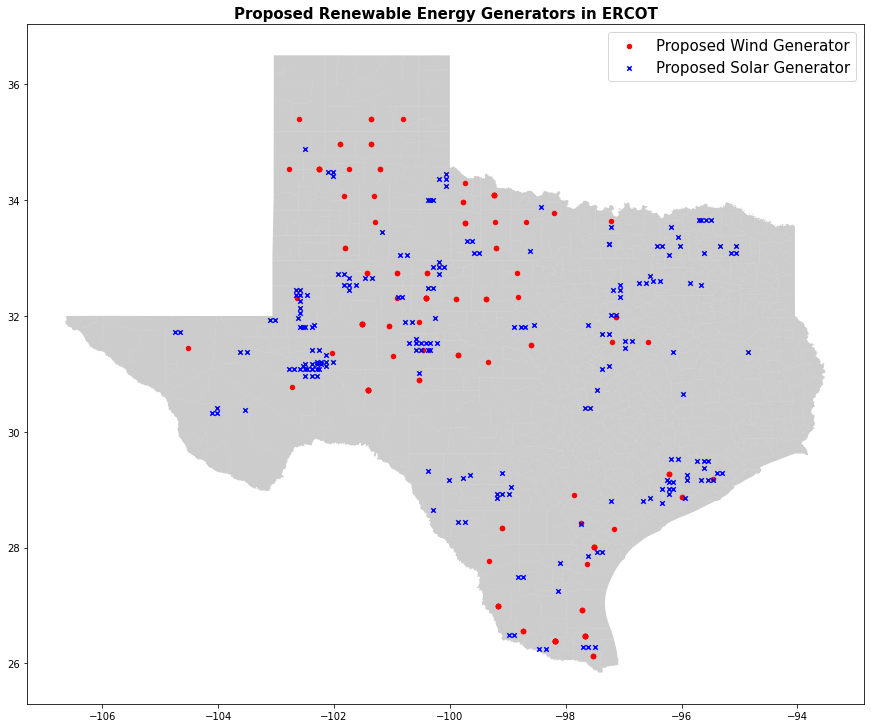

In [39]:
geometry2 = [Point(xy) for xy in zip(wind_pro['longi'], wind_pro['lati'])]
geo_wind_pro = gpd.GeoDataFrame(wind_pro, geometry = geometry2)
#geo_wind_real.head()

geometry3 = [Point(xy) for xy in zip(solar_pro['longitude'], solar_pro['latitude'])]
geo_solar_pro = gpd.GeoDataFrame(solar_pro, geometry = geometry3)
#geo_solar_real.head()

fig, ax = plt.subplots(figsize = (15,15))
texas.plot(ax = ax, alpha = 0.4, color="grey")

geo_wind_pro.plot(ax=ax, marker='o', color='red', markersize=20, label="Proposed Wind Generator");
geo_solar_pro.plot(ax=ax, marker='x', color='blue', markersize=20, label="Proposed Solar Generator");

plt.title('Proposed Renewable Energy Generators in ERCOT', fontsize=15,fontweight='bold')

#geo_wind_real['geometry'].plot(ax = ax, markersize = 20, color = "blue", marker="o", label= "Existing Wind Generator")
plt.legend(prop={'size':15})
plt.show()